# Análise das reservas de Hotel

https://www.kaggle.com/jessemostipak/hotel-booking-demand

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import time
import pycountry as pc

%matplotlib inline

In [2]:
pd.set_option('display.max_rows',101)

In [3]:
df = pd.read_csv("dataset/hotel_bookings.csv")

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
#verificando os valores do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

É possivel observar que as Colunas children, country, company e agent contem valores missing

In [6]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Limpeza e tratamento dos dados

In [7]:
#verificando os valores null
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [8]:
#Os métodos abaixo preenchem os valones NaN com 0 caso na mesma liinha da reserva tenha valores NaN em agent e company
#indicando que a reserva foi feita sem uma agência de viagens e sem ser pela empresa

#Agent
#método que gera verifica em cada linha se o valor é nulo nas duas colunas e caso sejam, altera o valor para 0 no agente
#caso não sejam nulos ele retorna o valor antigo e ao final devolve uma serie
def fill_ag(agent,company): 
    listagem = []
    for i in range(len(agent)):
        if((np.isnan(agent[i]) == True) and (np.isnan(company[i]) == True)):
            listagem.append(0)
        else:
            listagem.append(agent[i])
    return pd.Series(listagem)

#Company
#método que gera verifica em cada linha se o valor é 0 em agent e nulo na coluna company caso sejam, altera o valor para 0
# em company, caso não sejam 0 e nulo ele retorna o valor antigo e ao final devolve uma serie
def fill_cp(agent,company):   
    listagem = []
    for i in range(len(company)):
        if((agent[i] == 0) and (np.isnan(company[i]) == True)):
            listagem.append(0)
        else:
            listagem.append(company[i])
    return pd.Series(listagem)

In [9]:
#Preenchendo os valores de agent e company que são nulos 

#objeto que pega o tempo atual em segundos e grava na varriavel inicio
inicio = time.time()
df['agent'] = fill_ag(df['agent'],df['company'])
df['company'] = fill_cp(df['agent'],df['company'])
#objeto que pega o tempo atual em segundos e grava na varriavel fim
fim = time.time()

#imprime a diferença de tempo emtre o inicio e fim
#print(fim - inicio)

#Preenchendo os valores que sobraram em agent e company
#3333 = viajou com empresa
df['agent'].fillna(3333,inplace=True)

#1111 = viajou com agencia
df['company'].fillna(1111,inplace=True)

#Apagando os dados de children que são nulos
df['children'].fillna(0,inplace=True)

#Apagando os dados de country que são nulos
df['country'].fillna('Desconhecido',inplace=True)
#Canadá foi preenchido errado
df['country'].replace('CN','CAN',inplace=True)

#Crio uma lista contendo todos os indices de adultos,crianças e bebes com valor igual a 0
visitantes = list(df.loc[df["adults"]+ df["children"]+ df["babies"]==0].index)

#Dropo esses valores zerados
df.drop(df.index[visitantes],inplace=True)

#de acordo com a descrição das colunas Undefined e SC são a mesma informação
df['meal'].replace("Undefined", "SC", inplace=True)

#Corrigindo um outlier
df['adr'].replace(5400,df['adr'].median(),inplace=True)

#Traduzindo o nome dos meses
df['arrival_date_month'].replace(["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"],
           ['Janeiro','Fevereiro','Marco','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro', 'Novembro','Dezembro'],inplace=True)

#Criando uma lista com os meses ordenados
ordered_months = ['Janeiro','Fevereiro','Marco','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro', 'Novembro','Dezembro']
#Gravando os meses categorizados, com isso será possível ver os meses na ordem
df["arrival_date_month"] = pd.Categorical(df["arrival_date_month"], categories=ordered_months, ordered=True)

# Análise Exploratória
<hr>

### Qual é a epoca de maior movimento?

In [10]:
#Setando um fundo branco nos gráficos
sns.set_style("whitegrid")

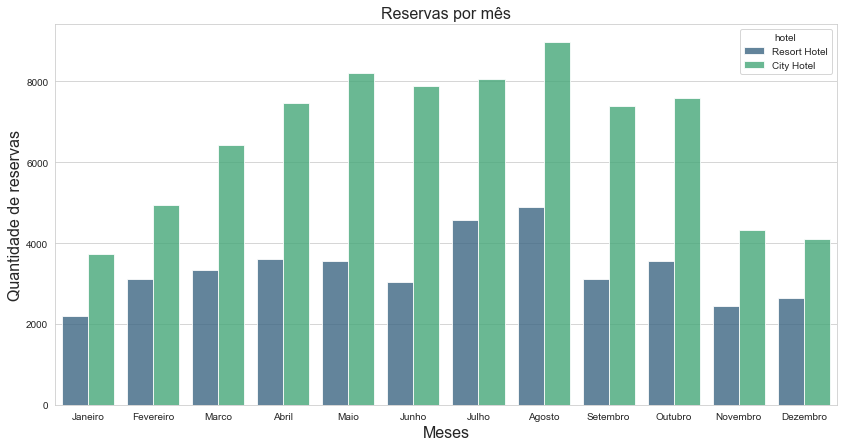

In [11]:
plt.figure(figsize=(14,7))
sns.countplot(x=df['arrival_date_month'],palette='viridis',alpha=0.8,hue=df['hotel'])

plt.rcParams['legend.fontsize'] = 13
plt.ylabel("Quantidade de reservas",fontsize=16)
plt.xlabel("Meses",fontsize=16)
plt.title("Reservas por mês",fontsize=16)
plt.show()

Se tratando do hotel em <strong>Lisboa</strong>, os meses mais frequentados são de março a setembro por conta da primavera e verão, porém, mesmo sendo uma bela cidade para se visitar nos meses de inverno o número de hospedes no hotel diminui consideravelmente comparando com os meses mais quentes.

Já o resort em <strong>Algarve</strong> tem como pico os meses de julho e agosto, por ser uma cidade litorânea suas praias atraem muitos visitantes nessa época, nos meses de fevereiro a outubro o resort mantém uma média de 3500 visitantes por mês.

As duas localizações apresentam um padrão parecido, o pico no número de visitantes também é em agosto. É possível observar que em ambos o movimento começa a apresentar crescimento em fevereiro e diminuição a partir de novembro.


### Qual melhor época do ano para se fazer reserva?

In [12]:
#Criação de uma coluna com a média das diarias por pessoa
df['adr_individual'] = df['adr'] / (df['adults' ]+ df['children'])

#Pegando os quartos que não foram cancelados
'''res = df[df['is_canceled'] == 0]
plt.figure(figsize=(14,7))
sns.lineplot(x='arrival_date_month',y='adr_individual',data=res,hue ='hotel',ci=0,palette='viridis')

plt.rcParams['legend.fontsize'] = 13
plt.ylabel("Valor de reservas",fontsize=16)
plt.xlabel("Meses",fontsize=16)
plt.title("Preço das reservas por mês",fontsize=16)
plt.show()'''

'res = df[df[\'is_canceled\'] == 0]\nplt.figure(figsize=(14,7))\nsns.lineplot(x=\'arrival_date_month\',y=\'adr_individual\',data=res,hue =\'hotel\',ci=0,palette=\'viridis\')\n\nplt.rcParams[\'legend.fontsize\'] = 13\nplt.ylabel("Valor de reservas",fontsize=16)\nplt.xlabel("Meses",fontsize=16)\nplt.title("Preço das reservas por mês",fontsize=16)\nplt.show()'

No hotel o preço das diárias costuma ser mais caro se comparado ao resort, seus preços ficam em média X €

Em relação ao preço das diárias, o valor por pessoa hospedada no resort começa a subir a partir do mês de maio, que é considerado média temporada na região de Algarve, e só volta a cair no fim da alta temporada, em setembro, meses como maio e setembro são considerados bons para se visitar a cidade pois nesses meses é possível aproveitar o calor sem enfrentar lugares muito movimentados economizando um pouco mais nas diárias.
Nos dois hoteis analisados é exibido o mesmo padrão, os preços são mais altos nos meses quentes e caem abruptamente nos meses mais frios


### Quanto os hospedes estão costumam gastar com as diarias?

In [13]:
#Selecionando apenas clientes que não cancelaram e se hospedaram no resort
rh = df[df['hotel'] == 'Resort Hotel']
rh = rh[rh['is_canceled'] == 0]
#Selecionando apenas clientes que não cancelaram e se hospedaram no hotel
ch = df[df['hotel'] == 'City Hotel']
ch =ch[ch['is_canceled'] == 0]

In [14]:
print('\nOs hóspedes do Resort em Algarve costumam pagar em média {:.2f}€ por pessoa e por noite.'.format(rh['adr_individual'].mean()))
print('Já os hóspedes do Hotel localizado em Lisboa costumam pagar {:.2f}€ por pessoa e por noite.'.format(ch['adr_individual'].mean()))


Os hóspedes do Resort em Algarve costumam pagar em média 47.49€ por pessoa e por noite.
Já os hóspedes do Hotel localizado em Lisboa costumam pagar 59.27€ por pessoa e por noite.


### Preço médio dos quartos?

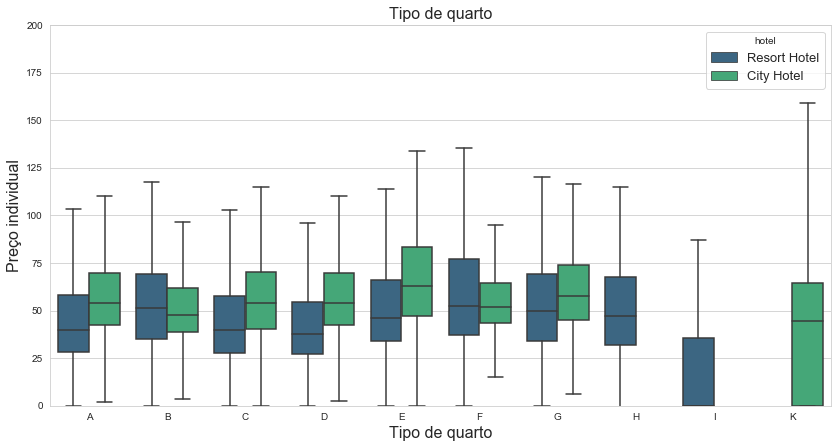

In [15]:
pmedio_quartos = df[df['is_canceled'] == 0]
plt.figure(figsize=(14,7))
sns.boxplot(x=pmedio_quartos['assigned_room_type'].sort_values(),y='adr_individual',
            data=pmedio_quartos,fliersize=0,hue='hotel',palette='viridis')
plt.ylim(0,200)

plt.rcParams['legend.fontsize'] = 13

plt.title("Tipo de quarto",fontsize=16)
plt.ylabel('Preço individual',fontsize=16)
plt.xlabel('Tipo de quarto',fontsize=16)
plt.show()

O gráfico acima mostra a distribuição dos preços por quarto. Os quartos foram distribuidos aleatoriamente para manter o anonimato, então é possivel que tenha quartos no resort e no hotel com a mesma letra porém com preços diferentes

In [16]:
media_quarto_rh = df['adr_individual'].groupby(rh['assigned_room_type']).mean().reset_index()
media_quarto_rh.rename(columns={'assigned_room_type':'Quarto','adr_individual':'Preco'},inplace=True)
cor = sns.light_palette("#3c6682", as_cmap=True)
media_quarto_rh.sort_values(by='Preco').style.background_gradient(cmap=cor)

,Quarto,Preco
8,I,20.387745
3,D,44.567274
2,C,45.392404
0,A,46.111934
7,H,50.723876
4,E,53.031747
6,G,54.811204
1,B,55.923589
5,F,59.083839


Esta listagem mostra o preço médio dos quartos no Resort

In [17]:
media_quarto_ch = df['adr_individual'].groupby(ch['assigned_room_type']).mean().reset_index()
media_quarto_ch.rename(columns={'assigned_room_type':'Quarto','adr_individual':'Preco'},inplace=True)
cor = sns.light_palette("#45a778", as_cmap=True)
media_quarto_ch.sort_values(by='Preco').style.background_gradient(cmap=cor)

,Quarto,Preco
7,K,42.317363
1,B,54.204633
5,F,57.867544
3,D,58.983686
2,C,59.102238
0,A,59.123993
6,G,63.261562
4,E,70.166400


Já nesta outra listagem podemops ver o preço médio dos quartos do hotel

### Quantos dias que costumam se hospedar nos hoteis? 

In [18]:
#Método para gerar uma tabela de frequencias
def tabela_de_frequencias(ch):
    tf = ch.value_counts().sort_index().reset_index()
    tf.rename(columns={'index':'dias','dias_hospedados':'fi'},inplace=True)
    tf['fri'] = np.round(ch.value_counts() / len(ch) * 100,2)
    tf['Fi'] = tf['fi'].cumsum()
    tf['Fri'] = np.round((tf['fi'] / len(ch)) * 100,2)
    return tf.sort_values(by='fri',ascending=False)

#Criando uma coluna somando o dia da semana com os finais de semana
rh['dias_hospedados'] = rh['stays_in_week_nights'] + rh['stays_in_weekend_nights']
ch['dias_hospedados'] = ch['stays_in_week_nights'] + ch['stays_in_weekend_nights']

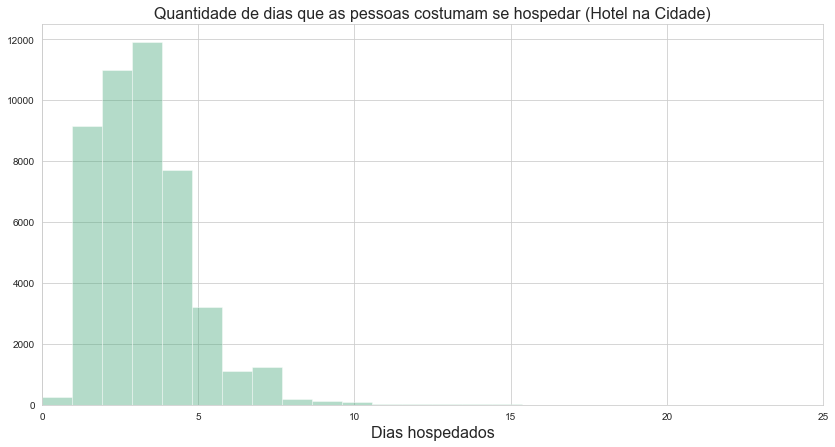

Neste histograma é possível observar que cerca de 70% dos hospedes costumam ficar hospedados no hotel de 1 a 3 dias, 
na tabela abaixo temos o percentual de hospedes que costumam ficar hospedados nesses dias.


,Dias,%
3,3,25.800000
2,2,23.830000
1,1,19.870000
4,4,16.700000
5,5,6.970000
7,7,2.700000
6,6,2.410000
0,0,0.540000
8,8,0.440000
9,9,0.260000


In [19]:
#City Hotel 
plt.figure(figsize=(14,7))
sns.distplot(ch['dias_hospedados'],bins=50,kde=False,color='#45a778')
plt.title("Quantidade de dias que as pessoas costumam se hospedar (Hotel na Cidade)",fontsize=16)
plt.xlabel('Dias hospedados',fontsize=16)
plt.xlim(0,25)
plt.show()

print('Neste histograma é possível observar que cerca de 70% dos hospedes costumam ficar hospedados no hotel de 1 a 3 dias,',
     '\nna tabela abaixo temos o percentual de hospedes que costumam ficar hospedados nesses dias.')
cor = sns.light_palette("#45a778", as_cmap=True)
tabela_de_frequencias_city_hotel = tabela_de_frequencias(ch['dias_hospedados'])
tabela_de_frequencias_city_hotel[['dias','fri']].head(10).rename(columns={'dias':'Dias','fri':'%'}).style.background_gradient(subset='%',cmap=cor)

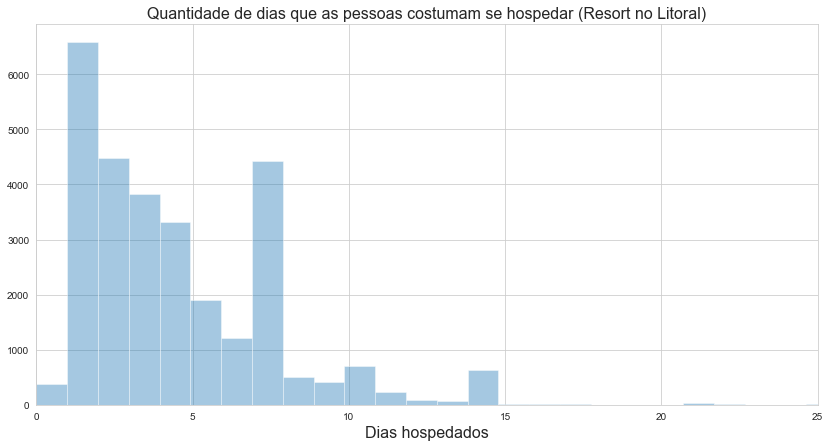

No Resort 51% dos visitantes ficam hospedados de 1 a 3 dias, e 15% dos hospedes costumam se hospedar por uma semana 
Abaixo também é possível observar a tabela com o percentual de dias que os visitantes costumam se hospedar.


,Dias,%
1,1,22.740000
2,2,15.510000
7,7,15.330000
3,3,13.230000
4,4,11.480000
5,5,6.560000
6,6,4.170000
10,10,2.420000
14,14,2.180000
8,8,1.760000


In [20]:
#resort Hotel 
plt.figure(figsize=(14,7))
sns.distplot(rh['dias_hospedados'],bins=70,kde=False)
plt.title("Quantidade de dias que as pessoas costumam se hospedar (Resort no Litoral)",fontsize=16)
plt.xlabel('Dias hospedados',fontsize=16)
plt.xlim(0,25)
plt.show()

print('No Resort 51% dos visitantes ficam hospedados de 1 a 3 dias, e 15% dos hospedes costumam se hospedar por uma semana',
     '\nAbaixo também é possível observar a tabela com o percentual de dias que os visitantes costumam se hospedar.')
cor = sns.light_palette("#3c6682", as_cmap=True)
tabela_de_frequencias_resort_hotel = tabela_de_frequencias(rh['dias_hospedados'])
tabela_de_frequencias_resort_hotel[['dias','fri']].head(10).rename(columns={'dias':'Dias','fri':'%'}).style.background_gradient(subset='%',cmap=cor)

### De onde vêm a maior parte dos visitantes?

In [21]:
#Método para retornar uma serie com o nome dos países
def set_pais(col):
    listagem = []
    for i in range(len(col)):
        try:
            var = pc.countries.get(alpha_3=col.iloc[i]).name
            listagem.append(var)
        except:
            listagem.append('Desconhecido')
    return pd.Series(listagem)

In [22]:
paises = df['country'].value_counts()
paises = paises.reset_index()
paises.rename(columns={'index':'País','country':'visitantes'},inplace=True)

paises['percentual'] = np.round((paises['visitantes'] / paises['visitantes'].sum()) * 100,2)
paises['Nome'] = set_pais(paises['País'])

paises.head(10)

,País,visitantes,percentual,Nome
0,PRT,48483,40.67,Portugal
1,GBR,12120,10.17,United Kingdom
2,FRA,10401,8.72,France
3,ESP,8560,7.18,Spain
4,DEU,7285,6.11,Germany
5,ITA,3761,3.15,Italy
6,IRL,3374,2.83,Ireland
7,BEL,2342,1.96,Belgium
8,BRA,2222,1.86,Brazil
9,NLD,2103,1.76,Netherlands


A maior parte das reservas vêm dos países europeus vizinhos de Portugal. 40% das reservas são feitas por Portugueses.

In [23]:
#px.scatter_geo(paises, locations="País",locationmode='ISO-3', color="País",hover_name="País", size="visitantes",title="<b>Países de onde vem a maior parte dos Visitantes</b>").show()

<img src="img/map.png">

### Cancelamentos

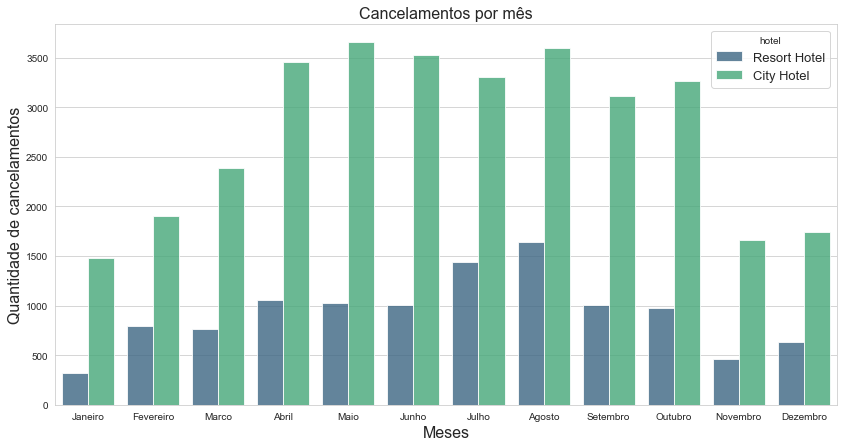

In [24]:
df_cancelados = df.loc[df['is_canceled'] == 1]

plt.figure(figsize=(14,7))
sns.countplot(x='arrival_date_month',data=df_cancelados,hue='hotel',alpha=0.8,palette='viridis')

plt.rcParams['legend.fontsize'] = 13
plt.ylabel("Quantidade de cancelamentos",fontsize=16)
plt.xlabel("Meses",fontsize=16)
plt.title("Cancelamentos por mês",fontsize=16)
plt.show()

É possível observar que os meses com o maior número de cancelametos são os meses de calor, onde há o maior número de reservas e nos meses de frio começa a diminuir. Esse padrão ocorre nos dois hotéis

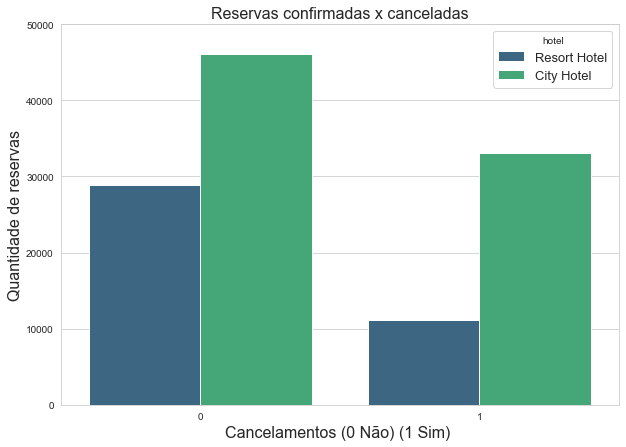

In [25]:
plt.figure(figsize=(10,7))
sns.countplot(df['is_canceled'],hue=df['hotel'],palette='viridis')
plt.yticks(np.arange(0,df.loc[df['is_canceled'] == 1].shape[0]+10000,10000))
plt.ylabel("Quantidade de reservas",fontsize=16)
plt.xlabel("Cancelamentos (0 Não) (1 Sim) ",fontsize=16)
plt.title("Reservas confirmadas x canceladas",fontsize=16)
plt.show()

Acima temos um gráfico mostrando as reservas confirmadas e os cancelamentos separando por hotel e resort

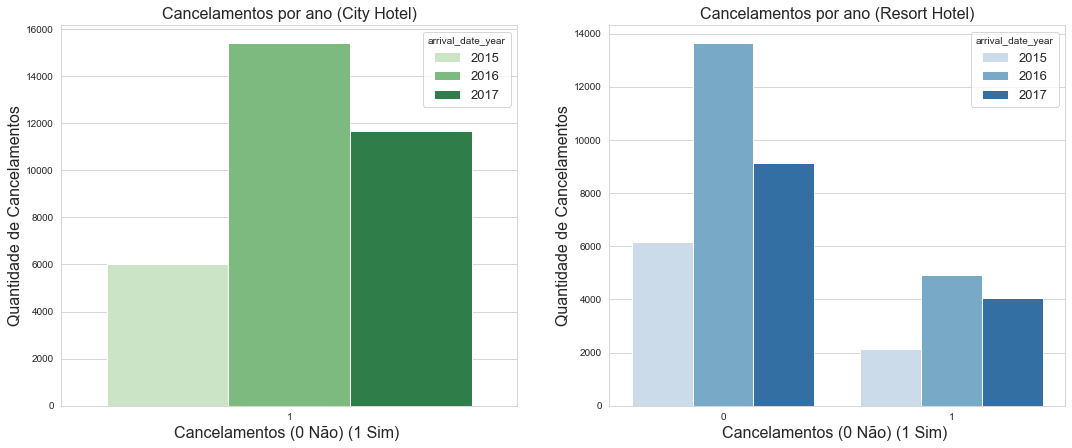

In [26]:
ch_c = df[df['hotel'] == 'City Hotel']
rh_c = df[df['hotel'] == 'Resort Hotel']
plt.rcParams['legend.fontsize'] = 13
#Cria subplot com 1 linha e 2 colunas
f, axes = plt.subplots(1, 2,figsize=(18,7))

#Cria o gráfico com os casos confirmados na coluna 0
sns.countplot(ch_c.loc[ch_c['is_canceled'] == 1]['is_canceled'],hue=ch_c['arrival_date_year'],palette='Greens',ax=axes[0])
#axes[0].set_yticks(np.arange(0,25000,4000))
axes[0].set_title("Cancelamentos por ano (City Hotel)",fontsize=16)
axes[0].set_ylabel("Quantidade de Cancelamentos",fontsize=16)
axes[0].set_xlabel("Cancelamentos (0 Não) (1 Sim) ",fontsize=16)

#Cria o gráfico com os óbitos confirmados na coluna 1
sns.countplot(rh_c['is_canceled'],hue=rh_c['arrival_date_year'],palette='Blues',ax=axes[1])
axes[1].set_title("Cancelamentos por ano (Resort Hotel)",fontsize=16)
axes[1].set_ylabel("Quantidade de Cancelamentos",fontsize=16)
axes[1].set_xlabel("Cancelamentos (0 Não) (1 Sim) ",fontsize=16)

plt.show()

###### Escrever algo aqui sobre o gráfico acima

#### Correlação entre os dados

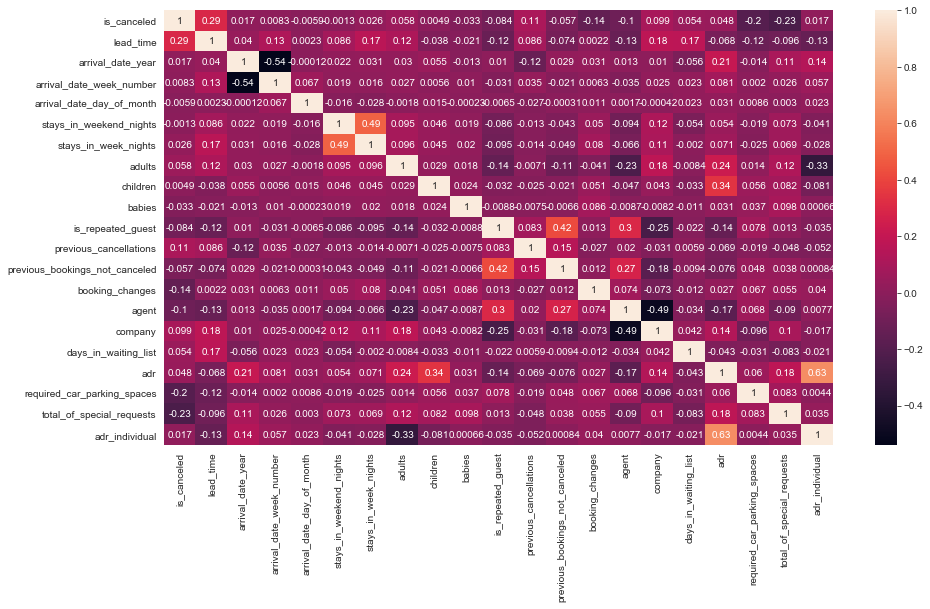

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [28]:
quant = df[['is_canceled','lead_time','company','days_in_waiting_list','adr','adults','booking_changes']]
#sns.pairplot(quant,hue='is_canceled')

# Algoritmos

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score, confusion_matrix, auc

##### Regressão Logistica

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
x=df[['lead_time','arrival_date_year','arrival_date_week_number', 
'arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights',
'adults','babies','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled',
'booking_changes','agent','company','days_in_waiting_list','adr','required_car_parking_spaces',
'total_of_special_requests']]
y=df['is_canceled']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [33]:
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
predictions = logmodel.predict(x_test)

Acuracia Score:  0.735739705134723

Classificação: 
               precision    recall  f1-score   support

           0       0.74      0.89      0.81     24717
           1       0.71      0.48      0.58     14623

    accuracy                           0.74     39340
   macro avg       0.73      0.68      0.69     39340
weighted avg       0.73      0.74      0.72     39340



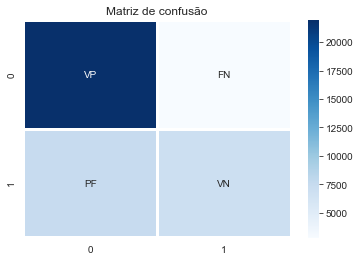

In [35]:
#Acuracia
print('Acuracia Score: ',logmodel.score(x_test,y_test))

#nClassificação do modelo
print('\nClassificação: \n',classification_report(y_test,predictions))
cm = confusion_matrix(y_test,predictions)

#Matriz de confusão
labels = ['VP','FN','PF','VN']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot=labels,fmt='',cmap='Blues',lw=2)
plt.title('Matriz de confusão')
plt.show()

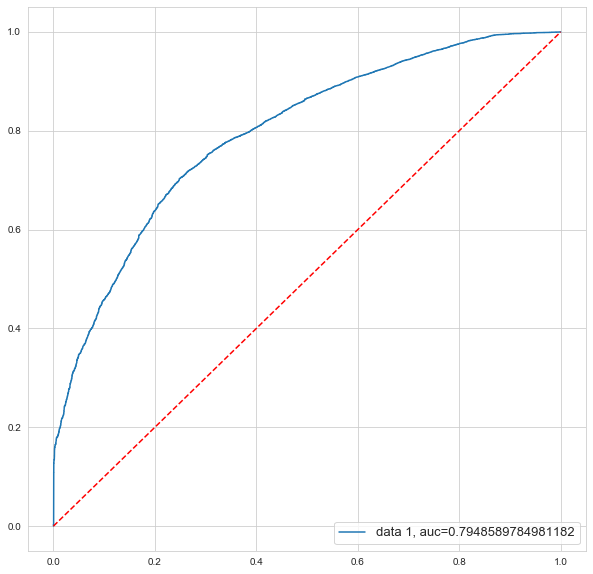

In [36]:
#ROC/AUC
plt.figure(figsize=(10,10))
y_pred_proba = logmodel.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)
plt.show()

##### KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
'''knn = KNeighborsClassifier(n_neighbors=20)'''

'knn = KNeighborsClassifier(n_neighbors=20)'

In [39]:
'''inicio = time.time()
knn.fit(x_train,y_train)
fim = time.time()
print(fim - inicio)'''

'inicio = time.time()\nknn.fit(x_train,y_train)\nfim = time.time()\nprint(fim - inicio)'

In [40]:
'''inicio = time.time()
pred = knn.predict(x_test)
fim = time.time()
print(fim - inicio)'''

'inicio = time.time()\npred = knn.predict(x_test)\nfim = time.time()\nprint(fim - inicio)'

In [41]:
'''print(confusion_matrix(y_test,pred))

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-41-d50d43d2f035>, line 1)

In [ ]:
'''print(classification_report(y_test,pred))

In [ ]:
'''error_rate = []
inicio = time.time()
# Will take some time
for i in range(1,40):
    print('\n',i)
    inicio_loop = time.time()
    knn = KNeighborsClassifier(n_neighbors=i)
    print('KNN pass')
    knn.fit(x_train,y_train)
    print('FIT pass')
    pred_i = knn.predict(x_test)
    print('Predict pass')
    error_rate.append(np.mean(pred_i != y_test))
    fim_loop = time.time()
    print('Tempo tempo da n volta ',fim_loop - inicio_loop)
    
fim = time.time()
print('Tempo total ',fim - inicio)'''

In [ ]:
'''plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')'''

In [ ]:
'''# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=30')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))'''

##### SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
#svclassifier = SVC(kernel='rbf')

In [ ]:
#svclassifier.fit(x_train, y_train)

In [ ]:
#y_pred = svclassifier.predict(x_test)

In [ ]:
#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))

#Linear
'''
[[21158  3559]
 [ 7012  7611]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80     24717
           1       0.68      0.52      0.59     14623

    accuracy                           0.73     39340
   macro avg       0.72      0.69      0.70     39340
weighted avg       0.73      0.73      0.72     39340'''

'''
VP FN
FP VN
'''

#rbf
'''
[[23777   940]
 [ 6648  7975]]
              precision    recall  f1-score   support

           0       0.78      0.96      0.86     24717
           1       0.89      0.55      0.68     14623

    accuracy                           0.81     39340
   macro avg       0.84      0.75      0.77     39340
weighted avg       0.82      0.81      0.79     39340'''




In [ ]:
#ROC/AUC
'''plt.figure(figsize=(10,10))
y_pred_proba = svclassifier.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)
plt.show()'''

https://www.kaggle.com/vssseel/eda-various-ml-models-and-nn-with-roc-curves

Acuracia = fração de previsões corretas que fiz no meu conjunto de teste (n_previsoes_corretas / n_total_previsoes) (um bom indicador como parametro inicial mas não é suficiente para tomar como conclusão)

Precisão = fração onde no numerador temos os verdadeiros positivos e no denominador todos os positivos previstos (VP / VP+FP) (Importante quando me importa os falso positivos)

Recall = fração onde no numerador temos os verdadeiros positivos e no denominador todos os reais positivos e falso negativos (VP + VP+FN) (Importante quando me importa os falso negativos, pois queremos diminuí-los)

Pontuação f1 = 2/((1/PRECISÃO) + (1/Recall))

Matiz de Confusão



In [ ]:
svclassifier.predict_proba()

# -----------------------------------------------------------------------